# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [10]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import urllib

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
! pip install citipy 
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

614

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key



data = []


print("Beginning Data Retrieval")
print("------------")

count_rec = 1
count_set = 1

for i, city in enumerate(cities):

    if (i % 50 == 0 and i >= 50):
        count_rec = 0
        count_set += 1


    cityurl = url + "&q=" + urllib.request.pathname2url(city)

    print("Processing Record %s of Set %s | %s" % (count_rec, count_set, city))
    print(cityurl)

    count_rec += 1

    # Set error for cities
    try:

        city_weather = requests.get(cityurl).json()

        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # Value error skip the city 
    except:
        print("City not found. Skipping...")
        pass

# Completion
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval
------------
Processing Record 1 of Set 1 | marcona
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0d655d96501543a5fa5b0b58431b4a25&q=marcona
City not found. Skipping...
Processing Record 2 of Set 1 | hobart
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0d655d96501543a5fa5b0b58431b4a25&q=hobart
Processing Record 3 of Set 1 | aykhal
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0d655d96501543a5fa5b0b58431b4a25&q=aykhal
Processing Record 4 of Set 1 | bluff
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0d655d96501543a5fa5b0b58431b4a25&q=bluff
Processing Record 5 of Set 1 | ponta do sol
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0d655d96501543a5fa5b0b58431b4a25&q=ponta%20do%20sol
Processing Record 6 of Set 1 | deputatskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0d655d96501543a5fa5b0b58431b4a25&q=deputatskiy
Processing Record 7 

City not found. Skipping...
Processing Record 2 of Set 2 | pimentel
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0d655d96501543a5fa5b0b58431b4a25&q=pimentel
Processing Record 3 of Set 2 | santa catarina de tepehuanes
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0d655d96501543a5fa5b0b58431b4a25&q=santa%20catarina%20de%20tepehuanes
Processing Record 4 of Set 2 | jamestown
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0d655d96501543a5fa5b0b58431b4a25&q=jamestown
Processing Record 5 of Set 2 | airai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0d655d96501543a5fa5b0b58431b4a25&q=airai
Processing Record 6 of Set 2 | bud
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0d655d96501543a5fa5b0b58431b4a25&q=bud
Processing Record 7 of Set 2 | labuhan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0d655d96501543a5fa5b0b58431b4a25&q=labuhan
Processing Record 8 of Set 2 |

Processing Record 6 of Set 3 | pevek
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0d655d96501543a5fa5b0b58431b4a25&q=pevek
Processing Record 7 of Set 3 | weligama
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0d655d96501543a5fa5b0b58431b4a25&q=weligama
Processing Record 8 of Set 3 | cabo san lucas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0d655d96501543a5fa5b0b58431b4a25&q=cabo%20san%20lucas
Processing Record 9 of Set 3 | bathsheba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0d655d96501543a5fa5b0b58431b4a25&q=bathsheba
Processing Record 10 of Set 3 | kapaa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0d655d96501543a5fa5b0b58431b4a25&q=kapaa
Processing Record 11 of Set 3 | codrington
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0d655d96501543a5fa5b0b58431b4a25&q=codrington
Processing Record 12 of Set 3 | bilibino
http://api.openweathermap.org/data/

Processing Record 9 of Set 4 | cherskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0d655d96501543a5fa5b0b58431b4a25&q=cherskiy
Processing Record 10 of Set 4 | saint anthony
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0d655d96501543a5fa5b0b58431b4a25&q=saint%20anthony
Processing Record 11 of Set 4 | qaanaaq
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0d655d96501543a5fa5b0b58431b4a25&q=qaanaaq
Processing Record 12 of Set 4 | mar del plata
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0d655d96501543a5fa5b0b58431b4a25&q=mar%20del%20plata
Processing Record 13 of Set 4 | mponela
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0d655d96501543a5fa5b0b58431b4a25&q=mponela
Processing Record 14 of Set 4 | bredasdorp
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0d655d96501543a5fa5b0b58431b4a25&q=bredasdorp
Processing Record 15 of Set 4 | prabumulih
http://api.ope

Processing Record 13 of Set 5 | changde
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0d655d96501543a5fa5b0b58431b4a25&q=changde
Processing Record 14 of Set 5 | sishui
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0d655d96501543a5fa5b0b58431b4a25&q=sishui
Processing Record 15 of Set 5 | kupang
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0d655d96501543a5fa5b0b58431b4a25&q=kupang
Processing Record 16 of Set 5 | bethel
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0d655d96501543a5fa5b0b58431b4a25&q=bethel
Processing Record 17 of Set 5 | havre-saint-pierre
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0d655d96501543a5fa5b0b58431b4a25&q=havre-saint-pierre
Processing Record 18 of Set 5 | potiskum
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0d655d96501543a5fa5b0b58431b4a25&q=potiskum
Processing Record 19 of Set 5 | lagoa
http://api.openweathermap.org/data/2.5

Processing Record 15 of Set 6 | khuzdar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0d655d96501543a5fa5b0b58431b4a25&q=khuzdar
Processing Record 16 of Set 6 | bambous virieux
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0d655d96501543a5fa5b0b58431b4a25&q=bambous%20virieux
Processing Record 17 of Set 6 | fallon
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0d655d96501543a5fa5b0b58431b4a25&q=fallon
Processing Record 18 of Set 6 | morondava
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0d655d96501543a5fa5b0b58431b4a25&q=morondava
Processing Record 19 of Set 6 | nikolskoye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0d655d96501543a5fa5b0b58431b4a25&q=nikolskoye
Processing Record 20 of Set 6 | manta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0d655d96501543a5fa5b0b58431b4a25&q=manta
Processing Record 21 of Set 6 | bolungarvik
http://api.openweathermap.or

Processing Record 18 of Set 7 | odessa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0d655d96501543a5fa5b0b58431b4a25&q=odessa
Processing Record 19 of Set 7 | udachnyy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0d655d96501543a5fa5b0b58431b4a25&q=udachnyy
Processing Record 20 of Set 7 | simplicio mendes
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0d655d96501543a5fa5b0b58431b4a25&q=simplicio%20mendes
Processing Record 21 of Set 7 | vila franca do campo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0d655d96501543a5fa5b0b58431b4a25&q=vila%20franca%20do%20campo
Processing Record 22 of Set 7 | arraial do cabo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0d655d96501543a5fa5b0b58431b4a25&q=arraial%20do%20cabo
Processing Record 23 of Set 7 | prainha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0d655d96501543a5fa5b0b58431b4a25&q=prainha
Processing Record 24 o

Processing Record 21 of Set 8 | colares
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0d655d96501543a5fa5b0b58431b4a25&q=colares
Processing Record 22 of Set 8 | nipawin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0d655d96501543a5fa5b0b58431b4a25&q=nipawin
Processing Record 23 of Set 8 | antofagasta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0d655d96501543a5fa5b0b58431b4a25&q=antofagasta
Processing Record 24 of Set 8 | kavaratti
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0d655d96501543a5fa5b0b58431b4a25&q=kavaratti
Processing Record 25 of Set 8 | ryotsu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0d655d96501543a5fa5b0b58431b4a25&q=ryotsu
Processing Record 26 of Set 8 | yarada
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0d655d96501543a5fa5b0b58431b4a25&q=yarada
Processing Record 27 of Set 8 | beinamar
http://api.openweathermap.org/data/2.5/weathe

Processing Record 24 of Set 9 | egvekinot
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0d655d96501543a5fa5b0b58431b4a25&q=egvekinot
Processing Record 25 of Set 9 | sarangani
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0d655d96501543a5fa5b0b58431b4a25&q=sarangani
Processing Record 26 of Set 9 | vaitupu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0d655d96501543a5fa5b0b58431b4a25&q=vaitupu
City not found. Skipping...
Processing Record 27 of Set 9 | vila velha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0d655d96501543a5fa5b0b58431b4a25&q=vila%20velha
Processing Record 28 of Set 9 | mangalia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0d655d96501543a5fa5b0b58431b4a25&q=mangalia
Processing Record 29 of Set 9 | medicine hat
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0d655d96501543a5fa5b0b58431b4a25&q=medicine%20hat
Processing Record 30 of Set 9 | nami

Processing Record 27 of Set 10 | mandali
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0d655d96501543a5fa5b0b58431b4a25&q=mandali
Processing Record 28 of Set 10 | ust-nera
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0d655d96501543a5fa5b0b58431b4a25&q=ust-nera
Processing Record 29 of Set 10 | haukipudas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0d655d96501543a5fa5b0b58431b4a25&q=haukipudas
Processing Record 30 of Set 10 | fort dodge
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0d655d96501543a5fa5b0b58431b4a25&q=fort%20dodge
Processing Record 31 of Set 10 | arrecife
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0d655d96501543a5fa5b0b58431b4a25&q=arrecife
City not found. Skipping...
Processing Record 32 of Set 10 | snezhnogorsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0d655d96501543a5fa5b0b58431b4a25&q=snezhnogorsk
Processing Record 33 of Set 10 |

Processing Record 30 of Set 11 | kondinskoye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0d655d96501543a5fa5b0b58431b4a25&q=kondinskoye
Processing Record 31 of Set 11 | mackay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0d655d96501543a5fa5b0b58431b4a25&q=mackay
Processing Record 32 of Set 11 | tumannyy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0d655d96501543a5fa5b0b58431b4a25&q=tumannyy
City not found. Skipping...
Processing Record 33 of Set 11 | wamba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0d655d96501543a5fa5b0b58431b4a25&q=wamba
Processing Record 34 of Set 11 | coolum beach
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0d655d96501543a5fa5b0b58431b4a25&q=coolum%20beach
Processing Record 35 of Set 11 | khandbari
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0d655d96501543a5fa5b0b58431b4a25&q=khandbari
Processing Record 36 of Set 11 | voh
htt

Processing Record 34 of Set 12 | golden
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0d655d96501543a5fa5b0b58431b4a25&q=golden
Processing Record 35 of Set 12 | emerald
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0d655d96501543a5fa5b0b58431b4a25&q=emerald
Processing Record 36 of Set 12 | savannah
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0d655d96501543a5fa5b0b58431b4a25&q=savannah
Processing Record 37 of Set 12 | chulman
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0d655d96501543a5fa5b0b58431b4a25&q=chulman
Processing Record 38 of Set 12 | port-cartier
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0d655d96501543a5fa5b0b58431b4a25&q=port-cartier
Processing Record 39 of Set 12 | fukue
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0d655d96501543a5fa5b0b58431b4a25&q=fukue
Processing Record 40 of Set 12 | enshi
http://api.openweathermap.org/data/2.5/weat

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [11]:
city_df = pd.DataFrame(data)

In [23]:
clouds = city_df["Cloudiness"]
windspeed = city_df["Wind Speed"]
latitude = city_df["Lat"]
maxtemp = city_df["Max Temp"]
humidity = city_df["Humidity"]

city_df.to_csv(output_data_file, index_label="City_ID")

city_df.count()

city_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,hobart,40,AU,1563409511,53,-42.88,147.33,50.00,3.36
1,aykhal,0,RU,1563409511,65,65.95,111.51,46.40,8.95
2,bluff,0,AU,1563409511,41,-23.58,149.07,60.72,3.11
3,ponta do sol,40,BR,1563409511,59,-20.63,-46.00,56.40,5.01
4,deputatskiy,98,RU,1563409511,76,69.30,139.90,38.22,10.54


#### Latitude vs. Temperature Plot

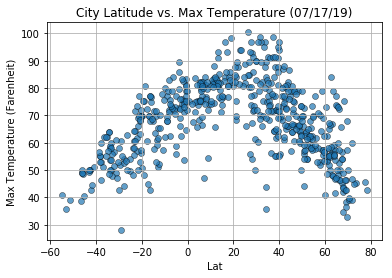

In [24]:
plt.scatter(latitude,
            maxtemp,
            edgecolor="black", linewidths=0.5, marker="o",
            alpha=0.7, label="Cities")
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (Farenheit)")
plt.xlabel("Lat")
plt.grid()
plt.savefig("output_data/citylatvmaxtemp.png")
plt.show()

#### Latitude vs. Humidity Plot

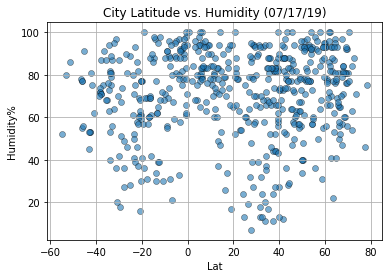

In [31]:
plt.scatter(latitude,
            humidity,
            edgecolor="black", linewidths=0.5, marker="o",
            alpha=0.6, label="Cities")

plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity%")
plt.xlabel("Lat")
plt.grid()

plt.savefig("output_data/citylatvhumidity.png")

plt.show()

#### Latitude vs. Cloudiness Plot

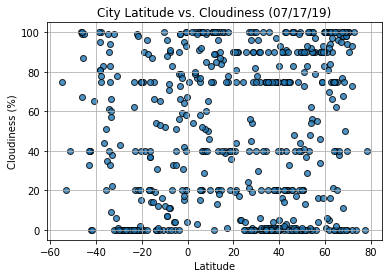

In [32]:
plt.scatter(latitude,
            clouds,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("output_data/citylatvclouds.png")

plt.show()


#### Latitude vs. Wind Speed Plot

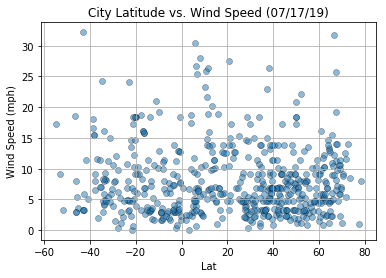

In [33]:
plt.scatter(latitude,
            windspeed,
            edgecolor="black", linewidths=0.5, marker="o",
            alpha=0.5, label="Cities")

plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Lat")
plt.grid(True)

plt.savefig("output_data/citylatvwindspeed.png")

plt.show()